In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_latih = pd.read_csv("train.csv")
data_uji = pd.read_csv("test.csv")

data_latih.describe()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
count,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11152.000000,11152.000000,11153.000000
mean,1.433208,1.349218,1.034646,1.735587,1985.837084,0.995517,3.176195,2009.174124,6.277952,3.720165,3.505694,1.202726,3.664216,1.100152,72.234902,0.679071,0.146777
std,0.431086,0.324660,0.416723,0.441040,4.632214,0.881103,13.321687,4.117162,5.033553,2.399068,1.818028,2.575138,2.652648,2.714525,23.030421,1.107381,0.353899
min,0.000000,0.000000,0.000000,1.000000,1963.000000,0.000000,0.000000,1982.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.510000,0.000000,0.000000
25%,1.224745,1.224745,0.707107,1.000000,1985.000000,0.000000,2.820000,2008.000000,4.000000,2.000000,2.000000,0.000000,2.000000,0.000000,56.650000,0.000000,0.000000
50%,1.352775,1.352775,1.118034,2.000000,1987.000000,1.000000,3.070000,2010.000000,5.000000,3.000000,3.000000,0.000000,3.000000,0.000000,71.675000,0.000000,0.000000
75%,1.414214,1.385641,1.224745,2.000000,1989.000000,2.000000,3.270000,2012.000000,6.000000,4.000000,4.000000,1.000000,5.000000,1.000000,88.172500,1.000000,0.000000
max,2.958040,2.828427,2.677686,2.000000,1997.000000,7.000000,378.000000,2019.000000,36.000000,22.000000,15.000000,29.000000,21.000000,77.000000,130.000000,3.000000,1.000000


In [10]:
# mengetahui jumlah missing value dari setiap kolom
for col in data_latih.columns.tolist():
    print('{} column missing values: {}'.format(col, data_latih[col].isnull().sum()))

job_level column missing values: 0
job_duration_in_current_job_level column missing values: 0
person_level column missing values: 0
job_duration_in_current_person_level column missing values: 0
job_duration_in_current_branch column missing values: 0
Employee_type column missing values: 0
gender column missing values: 0
age column missing values: 0
marital_status_maried(Y/N) column missing values: 0
number_of_dependences column missing values: 0
Education_level column missing values: 0
GPA column missing values: 0
year_graduated column missing values: 0
job_duration_from_training column missing values: 0
branch_rotation column missing values: 0
job_rotation column missing values: 0
assign_of_otherposition column missing values: 0
annual leave column missing values: 0
sick_leaves column missing values: 0
Last_achievement_% column missing values: 1
Achievement_above_100%_during3quartal column missing values: 1
Best Performance column missing values: 0


In [11]:
# menghapus missing value
data_latih = data_latih.dropna(axis=0, how="any")

In [2]:
data_latih.describe(include = ['O'])

,job_level,person_level,Employee_type,marital_status_maried(Y/N),Education_level
count,11153,11153,11153,11153,11153
unique,3,8,3,2,6
top,JG04,PG03,RM_type_A,Y,level_4
freq,10413,9655,7287,9501,9222


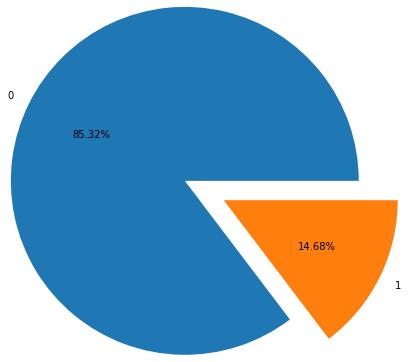

In [3]:
plt.pie(
    data_latih['Best Performance'].value_counts().values,
    labels=data_latih['Best Performance'].value_counts().index,
    autopct='%.2f%%',
    explode=[0.5, 0],
    radius=2,
)
plt.show()

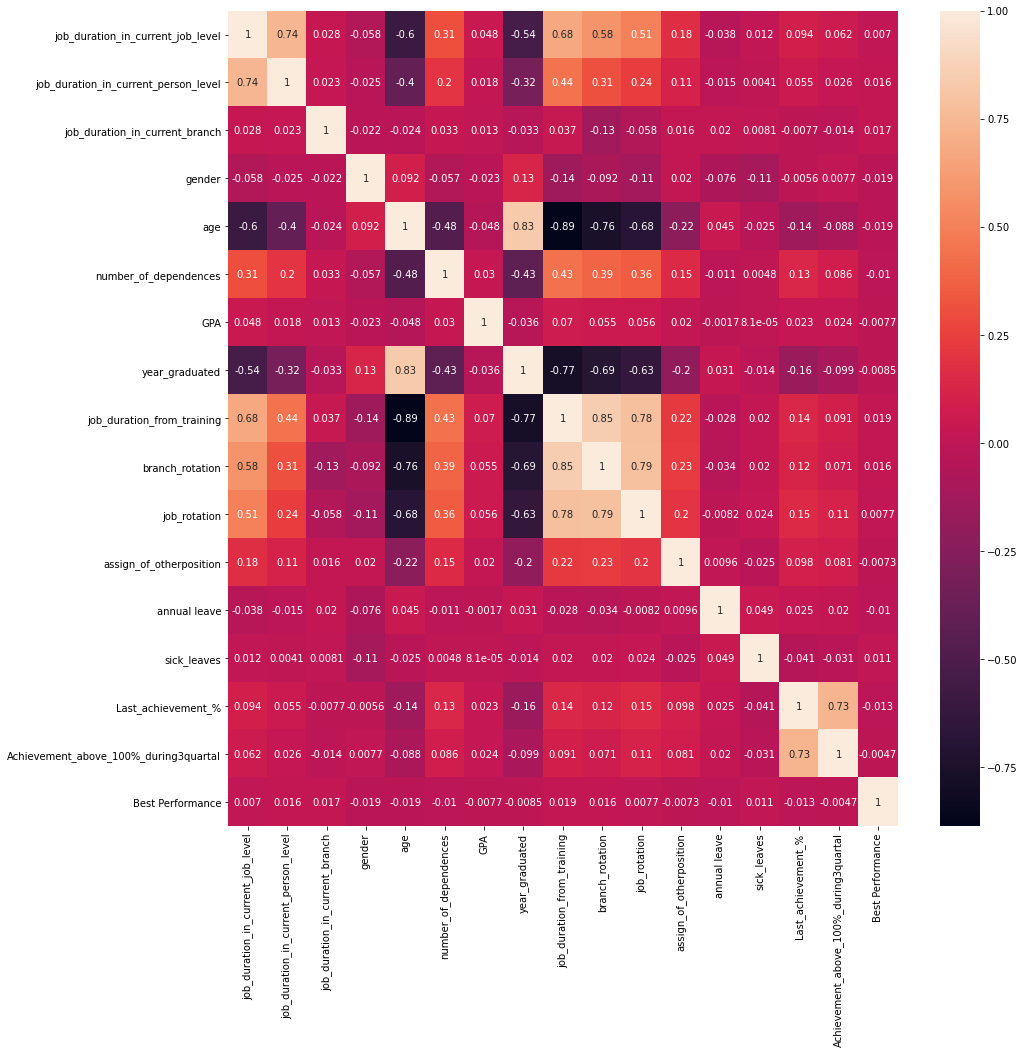

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(data_latih.corr(),
            annot=True
           )
plt.show()

In [5]:
## mendeteksi outlier
def deteksioutlier(data,kolom):
    plt.figure(figsize = (10, 5))
    sns.boxplot(data[kolom])
    plt.axvline(data[kolom].describe()['25%'], color = 'red', label = 'Q1')
    plt.axvline(data[kolom].describe()['50%'], color = 'yellow', label = 'Q2')
    plt.axvline(data[kolom].describe()['75%'], color = 'blue', label = 'Q3')
    plt.annotate('Outlier', (data[kolom].describe()['max'],0.1), xytext = (data[kolom].describe()['max'],0.3),
                 arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
    IQR = data[kolom].describe()['75%'] - data[kolom].describe()['25%']
    plt.annotate('Batas Atas', (data[kolom].describe()['75%'] + 1.5*IQR, 0.2),
                 xytext = (data[kolom].describe()['75%'] + 1.5*IQR, 0.4),
                 arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
    plt.annotate('Batas Bawah', (data[kolom].describe()['min'], 0.2), 
                 xytext = (data[kolom].describe()['min'], 0.4),
                 arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
    return plt.legend()

C:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


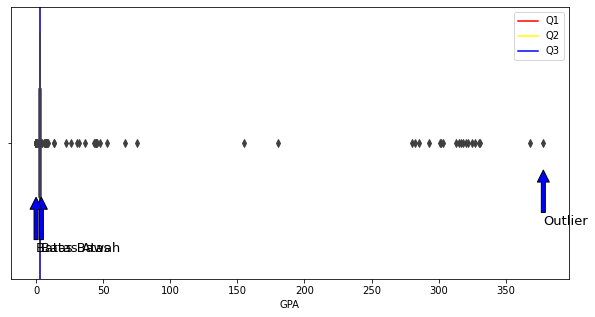

In [3]:
deteksioutlier(data_latih,"GPA")

C:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result 

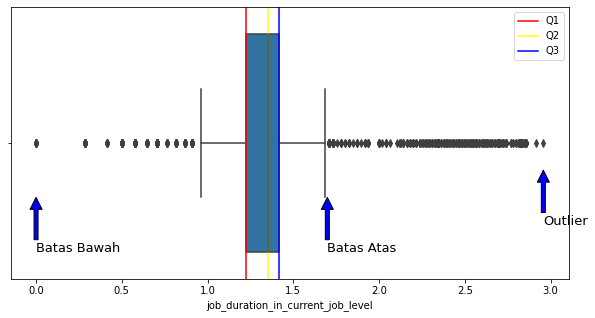

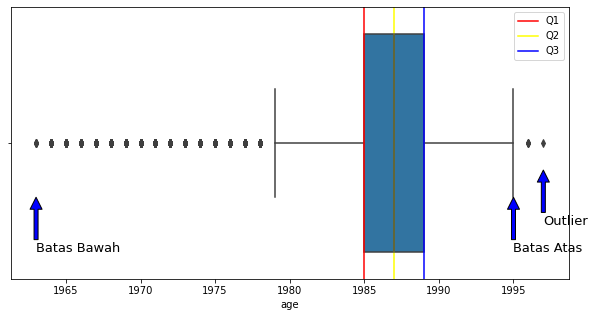

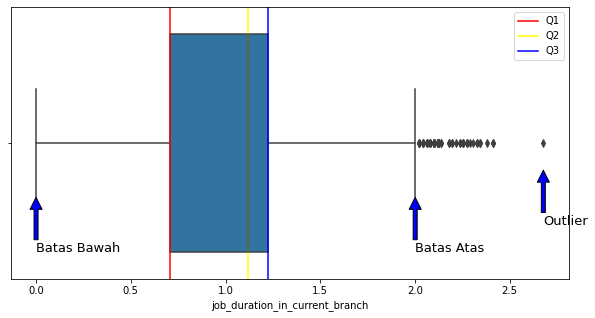

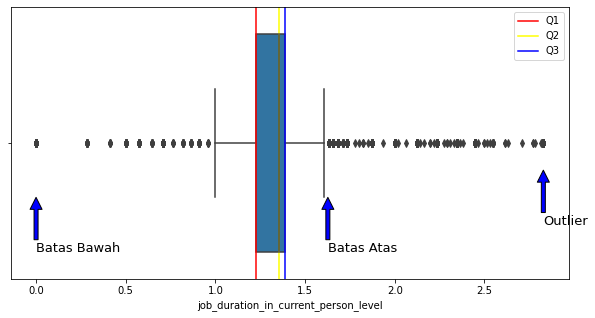

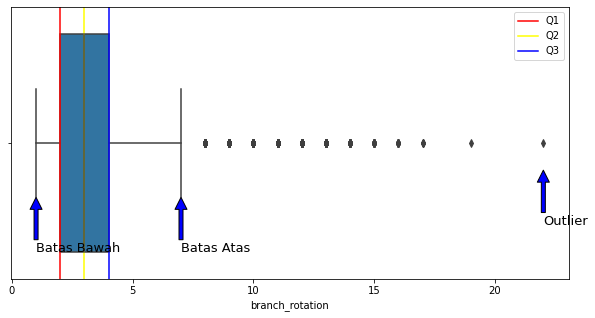

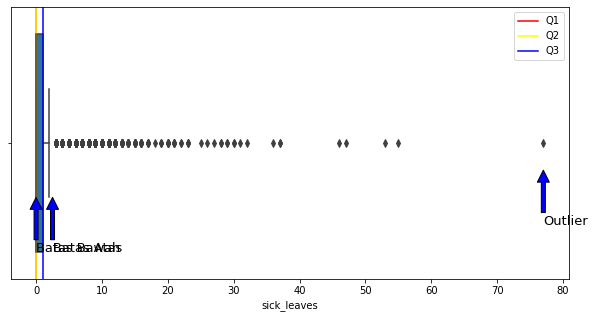

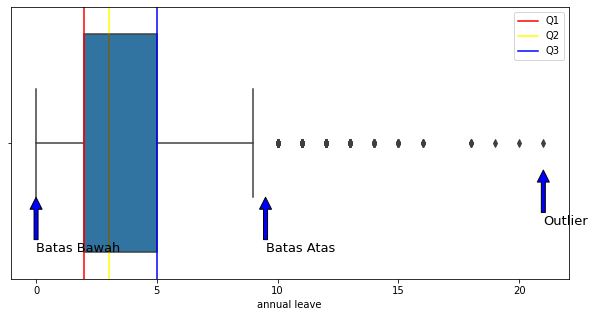

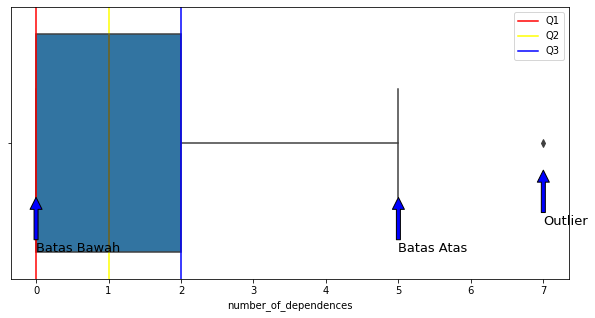

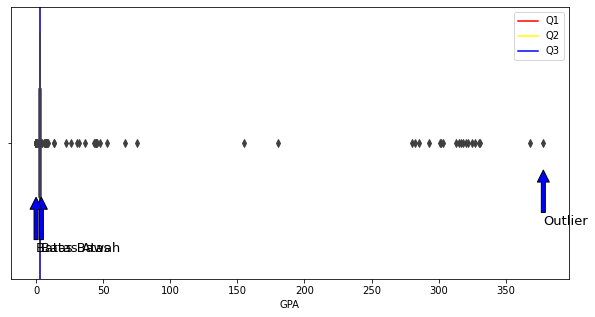

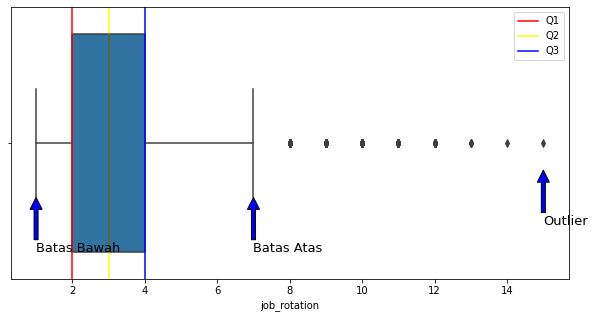

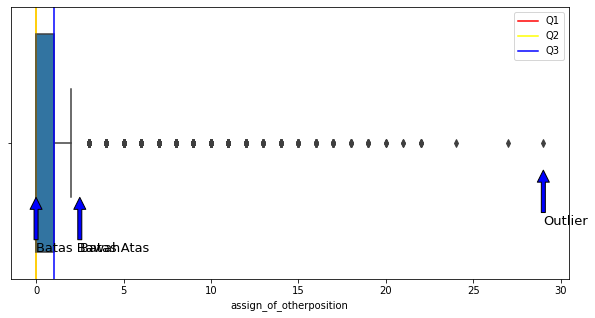

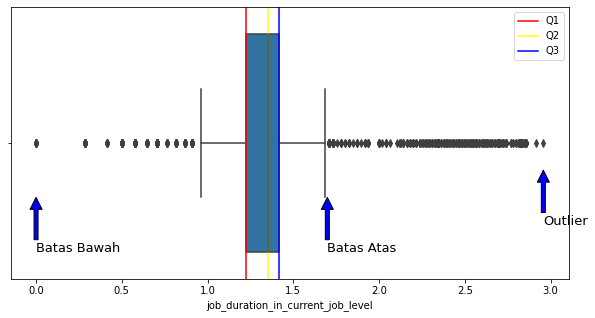

In [6]:
columns =['job_duration_in_current_job_level','age','job_duration_in_current_branch',
         'job_duration_in_current_person_level','branch_rotation',
         'sick_leaves','annual leave','number_of_dependences','GPA',
         'job_rotation','assign_of_otherposition','job_duration_in_current_job_level']

for item in columns:
    deteksioutlier(data_latih,item)

C:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result 

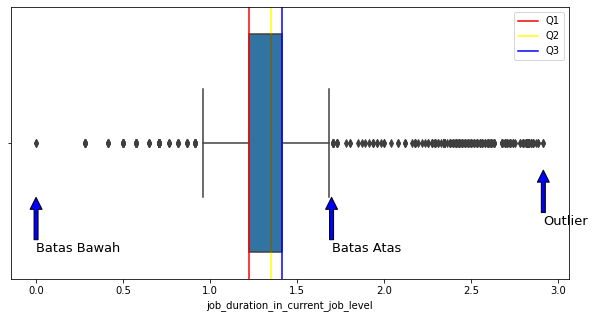

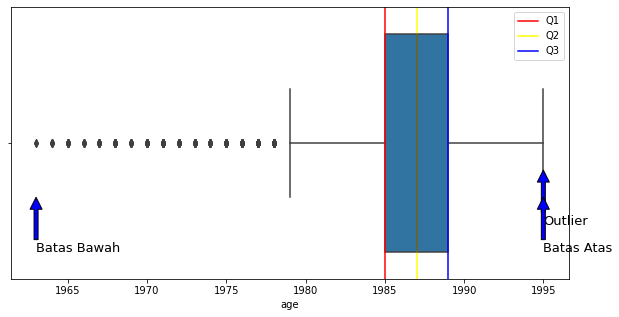

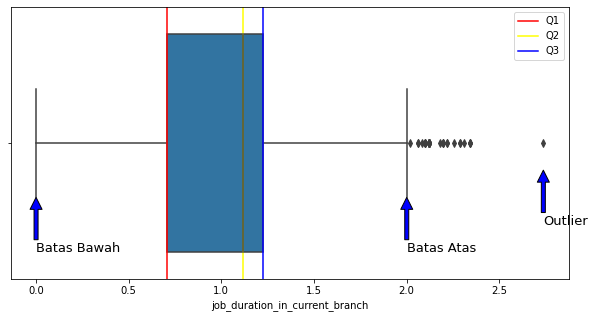

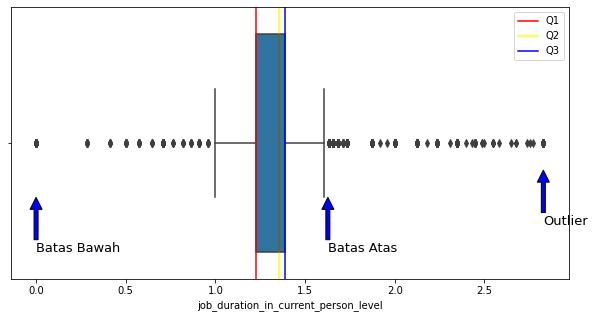

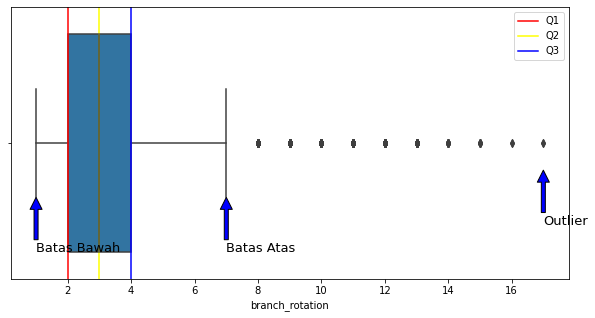

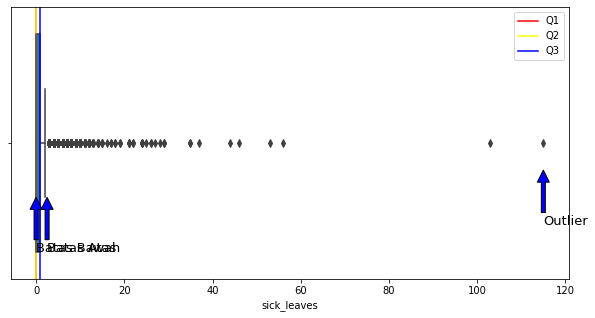

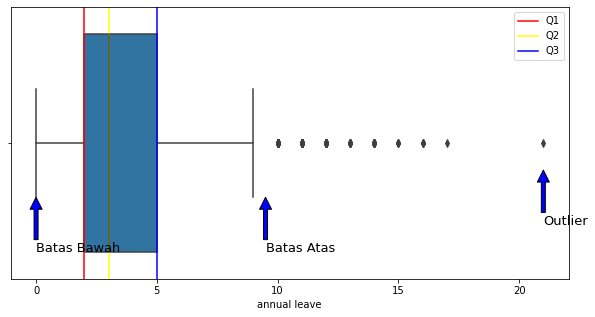

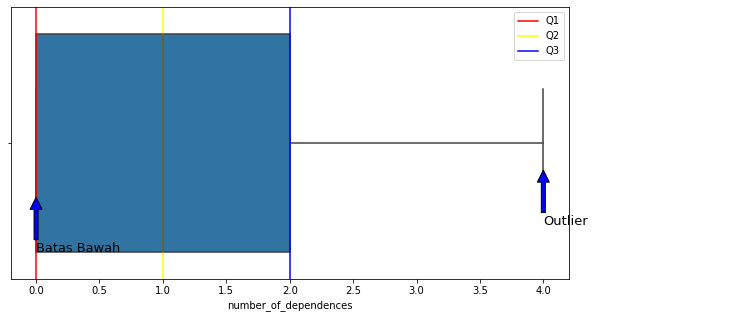

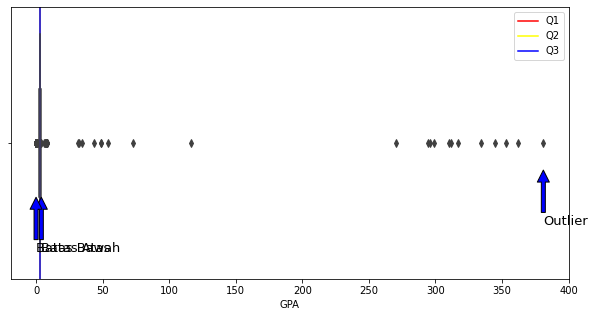

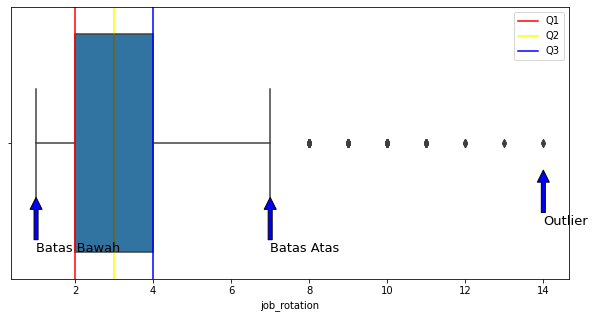

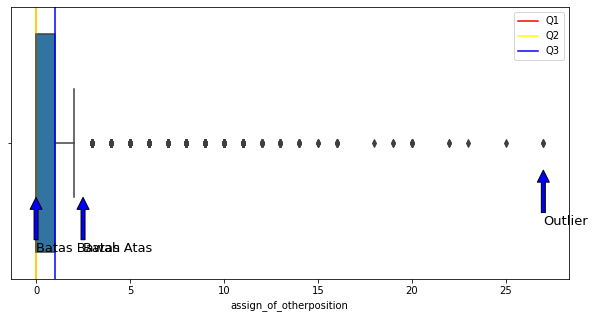

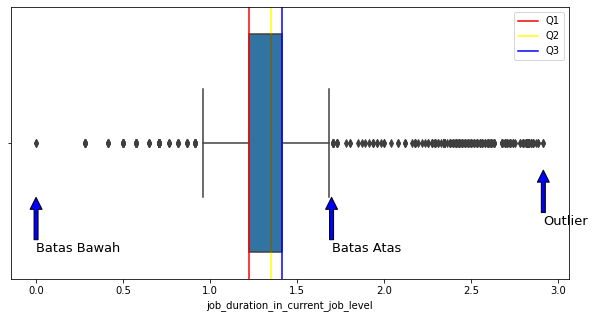

In [8]:
for item in columns:
    deteksioutlier(data_uji,item)